### EDA on Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set()

In [212]:
# read dataset
df = pd.read_csv("segmentation.csv")

In [213]:
df

,CustomerID,Date,Expense_time,Product_1,Product_2,Product_3
0,77869,12/24/2022,12/1/2022,0.00000,1.00,0.0
1,77859,12/24/2022,12/1/2022,0.00000,0.00,27.0
2,77810,12/23/2022,12/1/2022,0.00000,10.00,0.0
3,77805,12/23/2022,12/1/2022,0.00000,0.00,0.0
4,77786,12/22/2022,12/1/2022,0.00000,2.00,0.0
...,...,...,...,...,...,...
9466,40,1/14/2020,1/1/2020,23.51502,8.28,0.0
9467,2,1/13/2020,5/1/2020,0.00000,3.00,0.0
9468,2,1/13/2020,3/1/2020,15.00000,6.35,0.0
9469,2,1/13/2020,2/1/2020,8.50000,3.40,0.0


In [214]:
# checking probable missing values
df.isna().sum()

CustomerID      0
Date            0
Expense_time    0
Product_1       0
Product_2       0
Product_3       0
dtype: int64

In [215]:
# cheking types of each column
df.dtypes

CustomerID        int64
Date             object
Expense_time     object
Product_1       float64
Product_2       float64
Product_3       float64
dtype: object

In [216]:
# convert column to date type 
df["Expense_time"] = pd.to_datetime(df["Expense_time"])
df["Date"] = pd.to_datetime(df["Date"])

In [217]:
#extract year and month from expense time
df["Expense_time_year"] = df["Expense_time"].dt.year
df["Expense_time_month"] = df["Expense_time"].dt.month

In [218]:
# summary statistic of each feature
df.describe()

,CustomerID,Date,Expense_time,Product_1,Product_2,Product_3,Expense_time_year,Expense_time_month
count,9471.000000,9471,9471,9471.000000,9471.000000,9471.000000,9471.000000,9471.000000
mean,29694.787562,2021-08-01 03:37:43.541336832,2021-12-18 23:05:15.869496576,40.215033,48.044033,7.280742,2021.494774,6.659592
min,2.000000,2020-01-13 00:00:00,2020-01-01 00:00:00,0.000000,0.000000,0.000000,2020.000000,1.000000
25%,8997.000000,2021-01-11 00:00:00,2021-09-01 00:00:00,0.000000,0.000000,0.000000,2021.000000,4.000000
50%,26036.000000,2021-09-21 00:00:00,2022-02-01 00:00:00,0.000000,12.000000,0.000000,2022.000000,7.000000
75%,48433.000000,2022-01-25 12:00:00,2022-06-01 00:00:00,0.000000,31.000000,11.000000,2022.000000,9.000000
max,77869.000000,2022-12-24 00:00:00,2022-12-01 00:00:00,12149.500000,14588.684000,400.000000,2022.000000,12.000000
std,22316.852114,NaN,NaN,313.749147,242.141195,17.178264,0.640378,3.462707


In [219]:
# find rows with 0 product expense
df[(df["Product_1"] == 0 ) & (df["Product_2"] == 0) & (df["Product_3"] == 0)].index

Index([   3, 1269, 3888, 3957, 3958, 4143, 4468, 4919, 4924, 4967, 6060, 6780,
       6891, 7447, 7953, 8215, 9118, 9147, 9388, 9406, 9458, 9459],
      dtype='int64')

In [220]:
# delet rows with 0 product expense
df = df.drop(index = [3, 1269, 3888, 3957, 3958, 4143, 4468, 4919, 4924, 4967, 6060, 6780,
       6891, 7447, 7953, 8215, 9118, 9147, 9388, 9406, 9458, 9459])

In [221]:
df["Expense"] = df["Product_1"] + df["Product_2"] + df["Product_3"]

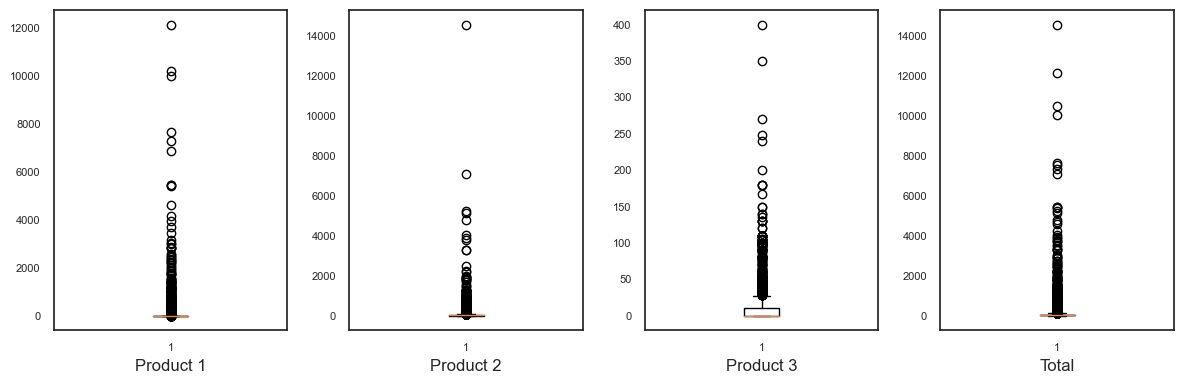

In [222]:
sns.set_style("white")
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(141)
plt.boxplot(df["Product_1"])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title("", weight = "bold")
plt.ylabel("", fontsize = 10)
plt.xlabel("Product 1")
ax = fig.add_subplot(142)
plt.boxplot(df["Product_2"])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title("", weight = "bold")
plt.ylabel("", fontsize = 10)
plt.xlabel("Product 2")
ax = fig.add_subplot(143)
plt.boxplot(df["Product_3"])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title("", weight = "bold")
plt.ylabel("", fontsize = 10)
plt.xlabel("Product 3")
ax = fig.add_subplot(144)
plt.boxplot(df["Expense"])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title("", weight = "bold")
plt.ylabel("", fontsize = 10)
plt.xlabel("Total")
plt.tight_layout()
#sns.despine()
plt.show()

In [223]:
df.describe()

,CustomerID,Date,Expense_time,Product_1,Product_2,Product_3,Expense_time_year,Expense_time_month,Expense
count,9449.000000,9449,9449,9449.000000,9449.000000,9449.000000,9449.000000,9449.000000,9449.000000
mean,29719.822838,2021-08-01 10:44:29.234839808,2021-12-19 10:41:26.358344960,40.308665,48.155894,7.297694,2021.496349,6.656577,95.762252
min,2.000000,2020-01-13 00:00:00,2020-01-01 00:00:00,0.000000,0.000000,0.000000,2020.000000,1.000000,0.000010
25%,9014.000000,2021-01-11 00:00:00,2021-09-01 00:00:00,0.000000,0.000000,0.000000,2021.000000,4.000000,12.000000
50%,26036.000000,2021-09-21 00:00:00,2022-02-01 00:00:00,0.000000,12.000000,0.000000,2022.000000,7.000000,23.749000
75%,48474.000000,2022-01-26 00:00:00,2022-06-01 00:00:00,0.000000,31.000000,11.000000,2022.000000,9.000000,56.200000
max,77869.000000,2022-12-24 00:00:00,2022-12-01 00:00:00,12149.500000,14588.684000,400.000000,2022.000000,12.000000,14588.684000
std,22316.588566,NaN,NaN,314.108214,242.411837,17.194655,0.639357,3.463194,404.745319


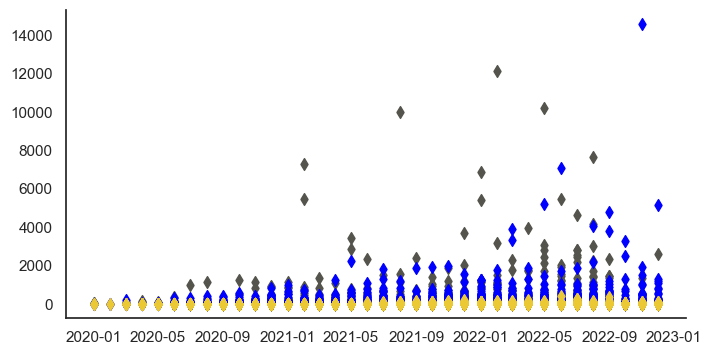

In [224]:
# product expense over time
plt.figure(figsize=(8, 4))
plt.scatter(df["Expense_time"], df["Product_1"], marker='d', c='#54544d')
plt.scatter(df["Expense_time"], df["Product_2"], marker='d', c='blue')
plt.scatter(df["Expense_time"], df["Product_3"], marker='d', c='#ebc934')
sns.despine()

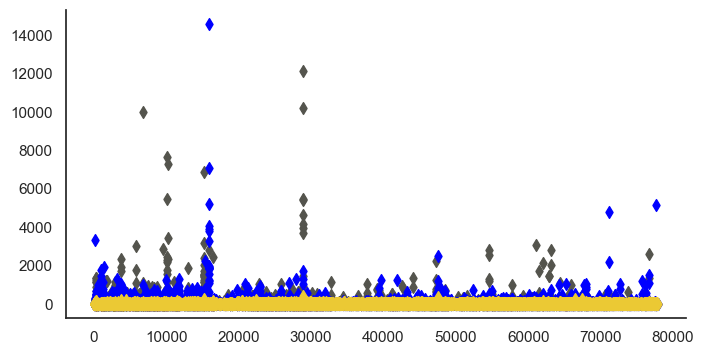

In [225]:
# product expense over ID
plt.figure(figsize=(8, 4))
plt.scatter(df["CustomerID"], df["Product_1"], marker='d', c='#54544d')
plt.scatter(df["CustomerID"], df["Product_2"], marker='d', c='blue')
plt.scatter(df["CustomerID"], df["Product_3"], marker='d', c='#ebc934')
sns.despine()

### Segmentation

RFM analysis stands for recency, frequency and monetary value

* Recency : This refers to the amount of time since a customer’s last interaction with a brand
* Frequency : This refers to the number of times a customer has made a purchase
* Monetary : This refers to the total amount a customer has spent purchasing products and services

In [226]:
# calculate Refrence for date which is the last day od the dataset
reference_date = df["Expense_time"].max()
reference_date

Timestamp('2022-12-01 00:00:00')

In [227]:
# calculate Recency
last_purchase_date = df.groupby(df["CustomerID"])["Expense_time"].max()
diff_date = reference_date - last_purchase_date
recency = diff_date.dt.days

In [228]:
# calculate Frequency
frequency = df.groupby(df["CustomerID"])["Expense_time"].nunique()
#frequency.sort_values()
#frequency.value_counts()

In [229]:
# calculate Monetary
df["weighted_average"] = df["Product_1"]*0.11 + df["Product_2"]*0.08 + df["Product_3"]*0.24
monetary = df.groupby(df["CustomerID"])["weighted_average"].sum()
monetary

CustomerID
2          5.590350
40         3.326053
41         0.352004
47         3.767680
111      589.204910
            ...    
77778      5.040000
77786      0.160000
77810      0.800000
77859      6.480000
77869      0.080000
Name: weighted_average, Length: 5235, dtype: float64

In [230]:
# dataframe of numeric values of rfm features 
df_num_rfm = pd.DataFrame({
    "Recency": recency,
    "Frequency": frequency,
    "Monetary": monetary
})
df_num_rfm

,Recency,Frequency,Monetary
CustomerID,,,
2,944,4,5.590350
40,974,3,3.326053
41,791,2,0.352004
47,791,2,3.767680
111,0,29,589.204910
...,...,...,...
77778,0,1,5.040000
77786,0,1,0.160000
77810,0,1,0.800000


In [231]:
# to rank recency and cut it to 5 parts
vals, counts = np.unique(recency, return_counts=True)
results = dict(zip(vals, counts))
recency_results = pd.Series(results)
#recency_results

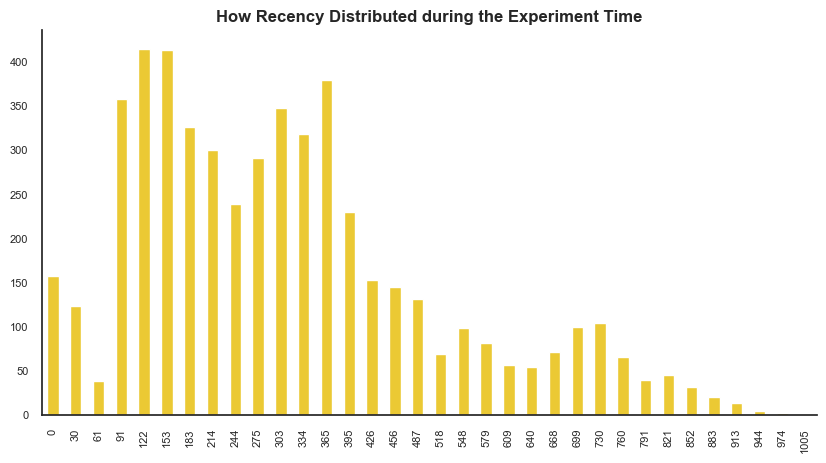

In [232]:
plt.figure(figsize = (10,5))
recency_results.plot.bar(color = "#ebc934")
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title("How Recency Distributed during the Experiment Time", weight = "bold")
#plt.ylabel("", fontsize = 10)
#plt.xlabel("")
sns.despine()
plt.show()

In [233]:
# delet rows with recency more than 2 years
#df_num_rfm[df_num_rfm["Recency"] < 730]
df_num_rfm = df_num_rfm.drop(df_num_rfm.loc[df_num_rfm["Recency"] >= 730].index)

In [234]:
df_num_rfm["recency_score"] = 0
df_num_rfm.loc[df_num_rfm["Recency"] > 548, "recency_score"] = 1
df_num_rfm.loc[(df_num_rfm["Recency"] > 365) & (df_num_rfm["Recency"] <= 548), "recency_score"] = 2
df_num_rfm.loc[(df_num_rfm["Recency"] > 244) & (df_num_rfm["Recency"] <= 365), "recency_score"] = 3
df_num_rfm.loc[(df_num_rfm["Recency"] > 122) & (df_num_rfm["Recency"] <= 244), "recency_score"] = 4
df_num_rfm.loc[df_num_rfm["Recency"] <= 122, "recency_score"] = 5

In [235]:
df_num_rfm["frequency_score"] = 0
df_num_rfm.loc[df_num_rfm["Frequency"] == 1, "frequency_score"] = 1
df_num_rfm.loc[df_num_rfm["Frequency"] == 2, "frequency_score"] = 2
df_num_rfm.loc[df_num_rfm["Frequency"] == 3, "frequency_score"] = 3
df_num_rfm.loc[df_num_rfm["Frequency"] == 4, "frequency_score"] = 4
df_num_rfm.loc[df_num_rfm["Frequency"] == 5, "frequency_score"] = 4
df_num_rfm.loc[df_num_rfm["Frequency"] >= 6, "frequency_score"] = 5

In [236]:
df_num_rfm["monetary_score"] = pd.qcut(monetary, 5, labels=[1, 2, 3, 4, 5])

In [237]:
df_num_rfm["ID"] = df_num_rfm.index.astype(str)

In [238]:
df_num_rfm["rfm"] = df_num_rfm["recency_score"].astype(float) + df_num_rfm["frequency_score"].astype(float) + df_num_rfm["monetary_score"].astype(float) 

In [239]:
df_num_rfm["RM"] = df_num_rfm["recency_score"].astype(str) + df_num_rfm["monetary_score"].astype(str) 

In [500]:
#df_num_rfm["rfm"].value_counts() 

In [499]:
#df_num_rfm["RM"].value_counts() 

In [242]:
df_num_rfm["Expense"] = df.groupby(df["CustomerID"])["Expense"].sum()

In [501]:
#df_num_rfm

In [244]:
df_num_rfm["Expense"].describe()

count     4903.000000
mean       181.724213
std       1429.720667
min          0.011000
25%         13.000000
50%         28.600000
75%         75.027500
max      62106.779000
Name: Expense, dtype: float64

In [258]:
df_num_rfm_drop = df_num_rfm.drop(df_num_rfm.loc[df_num_rfm["Expense"] >= 13915.45].index)
#df_num_rfm.loc[df_num_rfm["Expense"] >= 13915.45].index

### Finding Appropriate Number of Clusters

In [246]:
# import libraries 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [259]:
# new dataframe to use for standardizing
df_rfm = pd.DataFrame({
    "Recency": df_num_rfm_drop["Recency"],
    "Frequency": df_num_rfm_drop["Frequency"],
    "Monetary": df_num_rfm_drop["Monetary"],  
})

In [260]:
# standardizing because feature scales are different 
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_rfm)

In [261]:
# first method clustering to use in dedrogram
hier_clust = linkage(scaled_df, method = "ward")

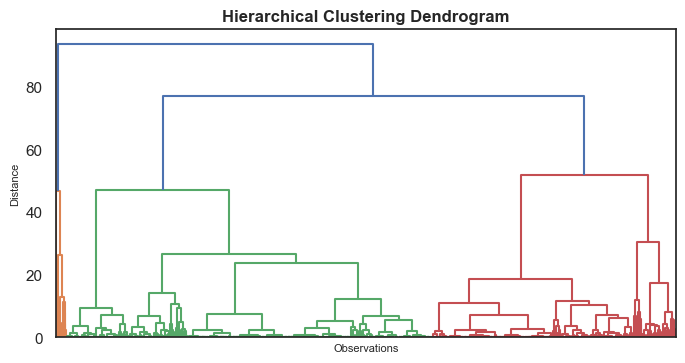

In [262]:
#plot dendrogram to see n. of clusters it suggest
sns.set_style("white")
plt.figure(figsize = (8,4))
dendrogram(hier_clust, show_leaf_counts = False, no_labels = True)
plt.xlabel("Observations", fontsize = 8)
plt.ylabel("Distance", fontsize = 8)
plt.title("Hierarchical Clustering Dendrogram", weight = "bold")
#sns.despine()
plt.show()

In [263]:
# find number of clusters by K-Means
inertia = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10).fit(scaled_df) 
    inertia.append(kmeans.inertia_)

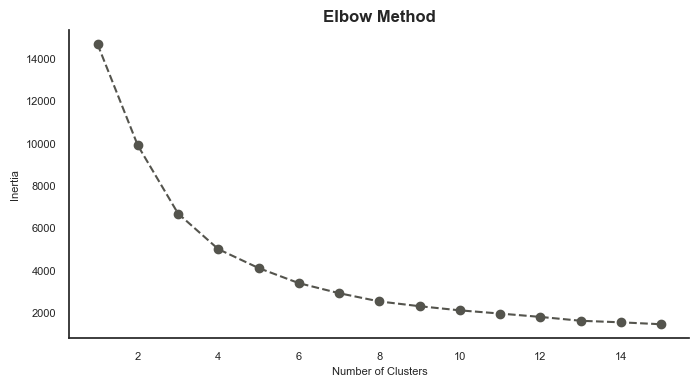

In [264]:
# plot suggested number of clusters by elbow method
plt.figure(figsize=(8, 4))
plt.plot(range(1, 16), inertia, marker='o', linestyle='--', color = "#54544d")
plt.xlabel('Number of Clusters', fontsize = 8)
plt.xticks(fontsize = 8)
plt.ylabel('Inertia', fontsize = 8)
plt.yticks(fontsize = 8)
plt.title('Elbow Method', weight = "bold")
sns.despine()
plt.show()

In [265]:
# KMeans to investigate each clusters summary statistics
k = 3  # n. of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_df)

C:\Users\Mahdis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [266]:
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
# add cluster labels 
df_rfm['Cluster'] = cluster_labels

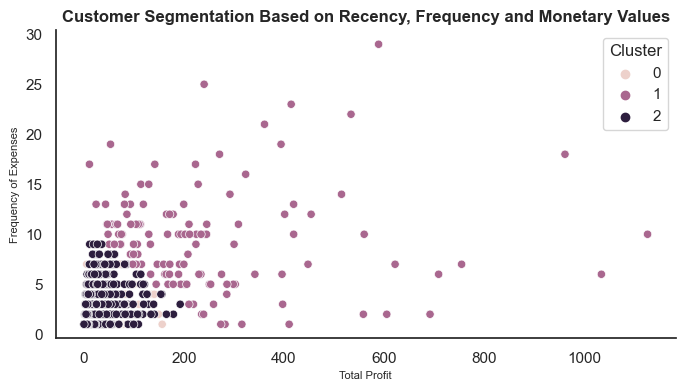

In [504]:
# visualize the clusters ----- Monetary and Frequency 
plt.figure(figsize = (8, 4))
sns.scatterplot(data = df_rfm, x="Monetary", y="Frequency", hue="Cluster")
plt.title("Customer Segmentation Based on Recency, Frequency and Monetary Values", weight = "bold")
plt.xlabel("Total Profit", fontsize = 8)
plt.ylabel("Frequency of Expenses", fontsize = 8)
plt.legend(title="Cluster")
sns.despine()
plt.show()

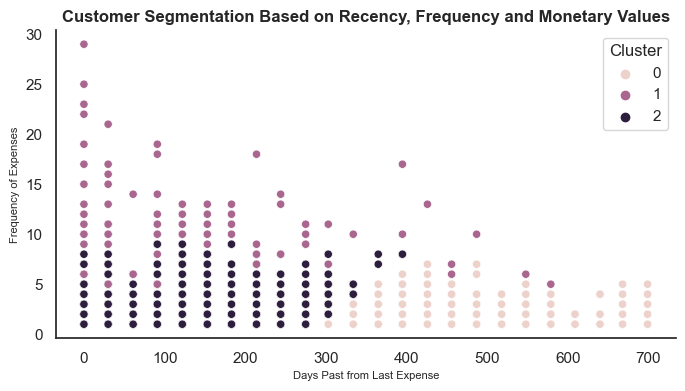

In [503]:
# visualize the clusters ----- Recency and Frequency
plt.figure(figsize = (8, 4))
sns.scatterplot(data = df_rfm, x="Recency", y="Frequency", hue="Cluster")
plt.title("Customer Segmentation Based on Recency, Frequency and Monetary Values", weight = "bold")
plt.xlabel("Days Past from Last Expense", fontsize = 8)
plt.ylabel("Frequency of Expenses", fontsize = 8)
plt.legend(title="Cluster")
sns.despine()
plt.show()

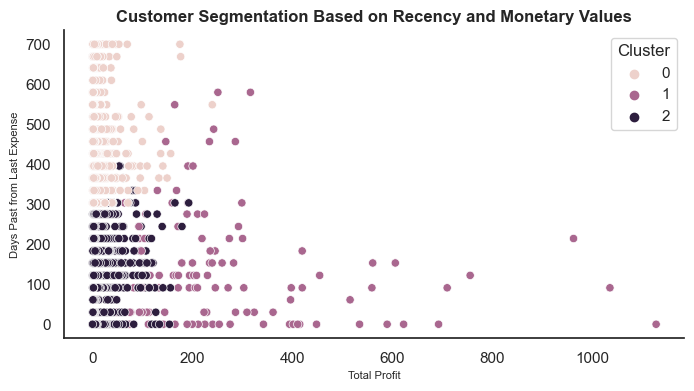

In [502]:
# visualize the clusters ----- Monetary and Recency
plt.figure(figsize = (8, 4))
sns.scatterplot(data = df_rfm, x="Monetary", y="Recency", hue="Cluster")
plt.title("Customer Segmentation Based on Recency and Monetary Values", weight = "bold")
plt.xlabel("Total Profit", fontsize = 8)
plt.ylabel("Days Past from Last Expense", fontsize = 8)
plt.legend(title="Cluster")
sns.despine()
plt.show()

Based on what I reviewed, I decided to choose 3 clusters based on R and M values, so the RFM need to rescore to 3 segments:

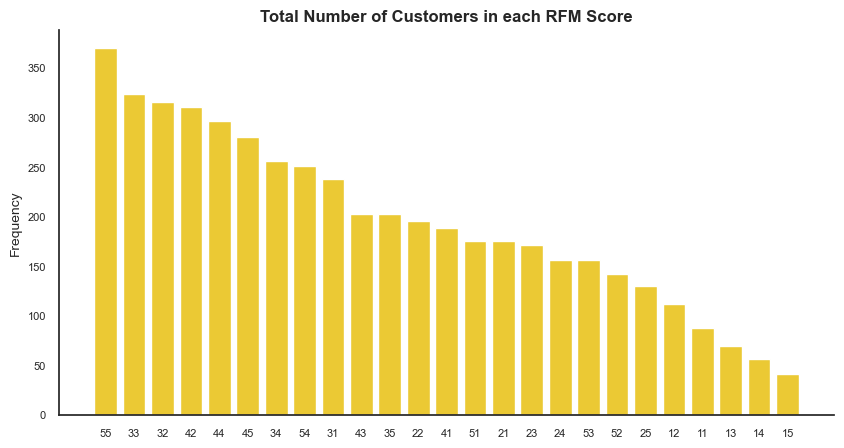

In [270]:
plt.figure(figsize = (10,5))
plt.bar(df_num_rfm["RM"].value_counts().index, height = df_num_rfm["RM"].value_counts(), color = "#ebc934")
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title("Total Number of Customers in each RM Score", weight = "bold")
plt.ylabel("Frequency", fontsize = 10)
plt.xlabel("")
sns.despine()
plt.show()

In [293]:
#df_num_rfm["Label_RM"] = 0
def labels(score):
    if score in ["55", "54", "44", "45", "35", "34", "25"]:
        return "Top"
    if score in ["51", "52", "53", "41", "42", "43", "24"]:
        return "Loyal"
    else:
        return 'Hibernating'

In [294]:
df_num_rfm['Label_RM'] = df_num_rfm['RM'].apply(labels)
df_num_rfm

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,ID,rfm,RM,Expense,Label_RM
CustomerID,,,,,,,,,,,
111,0,29,589.204910,5,5,5,111,15.0,55,6052.817616,Top
278,214,18,961.888378,4,5,5,278,14.0,45,8984.419800,Top
282,395,17,10.995856,2,5,4,282,11.0,24,103.539600,Loyal
287,91,5,302.576572,5,4,5,287,14.0,55,2949.039200,Top
295,0,12,165.029450,5,5,5,295,15.0,55,1615.090000,Top
...,...,...,...,...,...,...,...,...,...,...,...
77778,0,1,5.040000,5,1,4,77778,10.0,54,21.000000,Top
77786,0,1,0.160000,5,1,1,77786,7.0,51,2.000000,Loyal
77810,0,1,0.800000,5,1,1,77810,7.0,51,10.000000,Loyal


In [296]:
RM_label = df_num_rfm.groupby(df_num_rfm["Label_RM"])["ID"].nunique()
RM_label

Label_RM
Hibernating    1786
Loyal          1331
Top            1786
Name: ID, dtype: int64

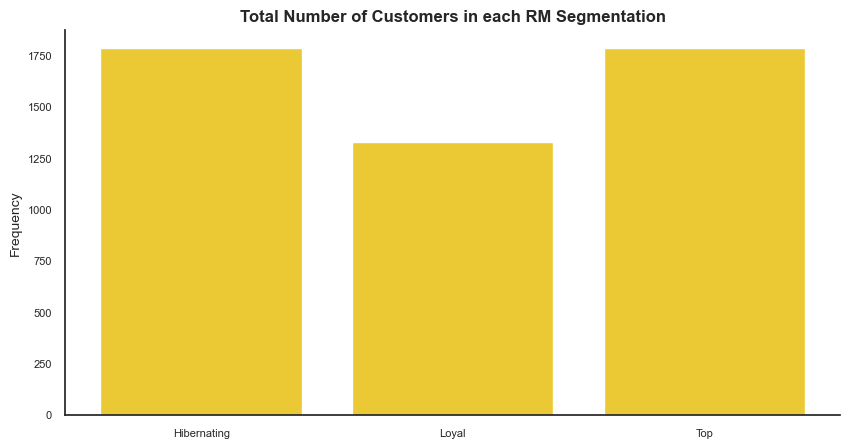

In [297]:
plt.figure(figsize = (10,5))
plt.bar(RM_label.index, height = RM_label.values, color = "#ebc934")
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title("Total Number of Customers in each RM Segmentation", weight = "bold")
plt.ylabel("Frequency", fontsize = 10)
plt.xlabel("")
sns.despine()
plt.show()

In [505]:
cluster_1 = df_num_rfm[df_num_rfm["Label_RM"] == "Hibernating"]
cluster_2 = df_num_rfm[df_num_rfm["Label_RM"] == "Loyal"]
cluster_3 = df_num_rfm[df_num_rfm["Label_RM"] == "Top"]

In [506]:
summary_1 = cluster_1[["Monetary","Frequency", "Recency"]].describe().round(2)
summary_1

,Monetary,Frequency,Recency
count,1786.00,1786.00,1786.00
mean,3.37,1.16,429.59
std,11.74,0.46,130.10
min,0.00,1.00,275.00
25%,1.14,1.00,334.00
50%,2.11,1.00,395.00
75%,3.44,1.00,518.00
max,315.81,5.00,699.00


In [507]:
summary_2 = cluster_2[["Monetary","Frequency", "Recency"]].describe().round(2)
summary_2

,Monetary,Frequency,Recency
count,1331.00,1331.00,1331.00
mean,2.96,1.24,185.70
std,2.18,0.73,115.36
min,0.08,1.00,0.00
25%,1.12,1.00,122.00
50%,2.64,1.00,153.00
75%,3.82,1.00,214.00
max,11.29,17.00,548.00


In [508]:
summary_3 = cluster_3[["Monetary","Frequency", "Recency"]].describe().round(2)
summary_3

,Monetary,Frequency,Recency
count,1786.00,1786.00,1786.00
mean,46.83,2.97,202.94
std,228.76,2.77,121.93
min,4.90,1.00,0.00
25%,7.33,1.00,122.00
50%,12.81,2.00,183.00
75%,27.30,4.00,303.00
max,5980.47,29.00,548.00


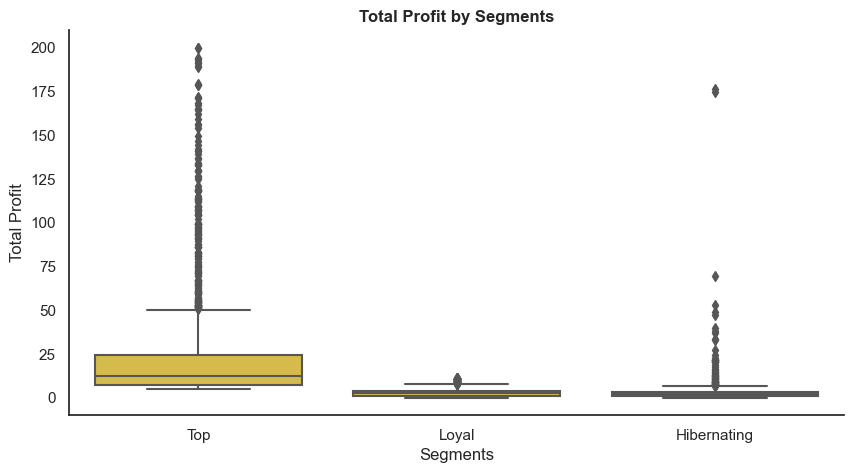

In [307]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_num_rfm["Label_RM"], y=df_num_rfm[df_num_rfm["Monetary"] < 200]["Monetary"], color = "#ebc934")
plt.title("Total Profit by Segments", weight = "bold")
plt.xlabel("Segments")
plt.ylabel("Total Profit")
sns.despine()
plt.show()

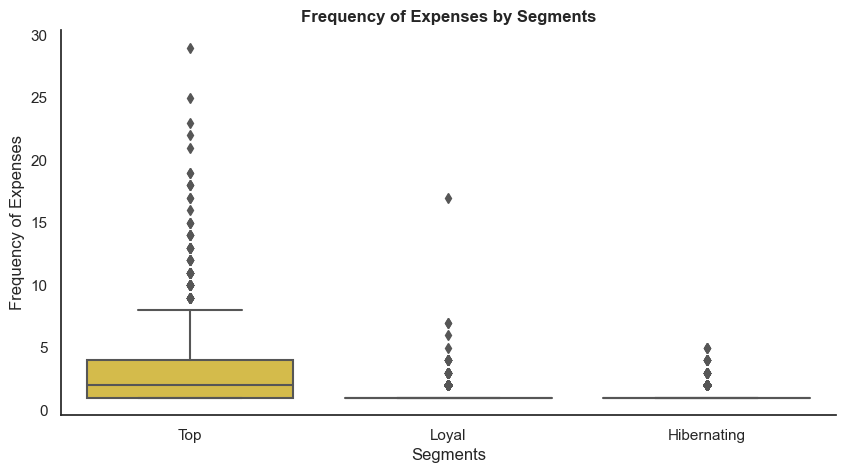

In [302]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_num_rfm, x="Label_RM", y="Frequency", color = "#ebc934")
plt.title("Frequency of Expenses by Segments", weight = "bold")
plt.xlabel("Segments")
plt.ylabel("Frequency of Expenses")
sns.despine()
plt.show()

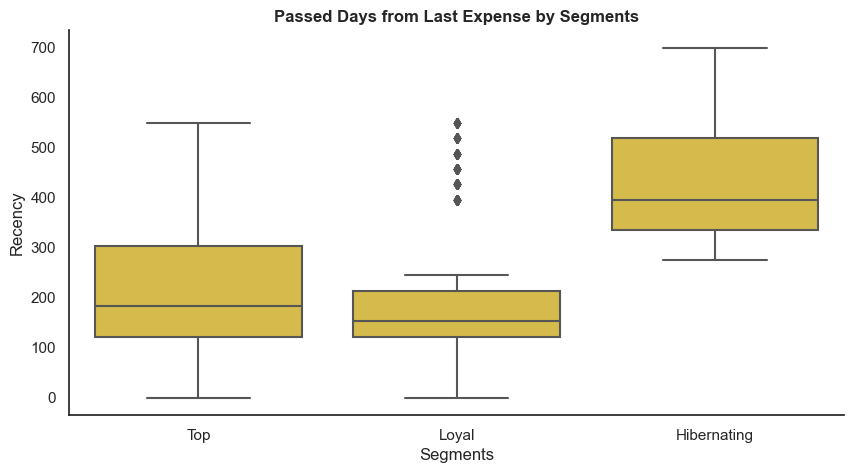

In [303]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_num_rfm, x="Label_RM", y="Recency", color = "#ebc934")
plt.title("Passed Days from Last Expense by Segments", weight = "bold")
plt.xlabel("Segments")
plt.ylabel("Recency")
sns.despine()
plt.show()

In [308]:
df.describe()

,CustomerID,Date,Expense_time,Product_1,Product_2,Product_3,Expense_time_year,Expense_time_month,Expense,weighted_average
count,9449.000000,9449,9449,9449.000000,9449.000000,9449.000000,9449.000000,9449.000000,9449.000000,9449.000000
mean,29719.822838,2021-08-01 10:44:29.234839808,2021-12-19 10:41:26.358344960,40.308665,48.155894,7.297694,2021.496349,6.656577,95.762252,10.037871
min,2.000000,2020-01-13 00:00:00,2020-01-01 00:00:00,0.000000,0.000000,0.000000,2020.000000,1.000000,0.000010,0.000001
25%,9014.000000,2021-01-11 00:00:00,2021-09-01 00:00:00,0.000000,0.000000,0.000000,2021.000000,4.000000,12.000000,1.390400
50%,26036.000000,2021-09-21 00:00:00,2022-02-01 00:00:00,0.000000,12.000000,0.000000,2022.000000,7.000000,23.749000,3.040000
75%,48474.000000,2022-01-26 00:00:00,2022-06-01 00:00:00,0.000000,31.000000,11.000000,2022.000000,9.000000,56.200000,6.655000
max,77869.000000,2022-12-24 00:00:00,2022-12-01 00:00:00,12149.500000,14588.684000,400.000000,2022.000000,12.000000,14588.684000,1336.445000
std,22316.588566,NaN,NaN,314.108214,242.411837,17.194655,0.639357,3.463194,404.745319,40.517075


In [309]:
df_num_rfm

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,ID,rfm,RM,Expense,Label_RM
CustomerID,,,,,,,,,,,
111,0,29,589.204910,5,5,5,111,15.0,55,6052.817616,Top
278,214,18,961.888378,4,5,5,278,14.0,45,8984.419800,Top
282,395,17,10.995856,2,5,4,282,11.0,24,103.539600,Loyal
287,91,5,302.576572,5,4,5,287,14.0,55,2949.039200,Top
295,0,12,165.029450,5,5,5,295,15.0,55,1615.090000,Top
...,...,...,...,...,...,...,...,...,...,...,...
77778,0,1,5.040000,5,1,4,77778,10.0,54,21.000000,Top
77786,0,1,0.160000,5,1,1,77786,7.0,51,2.000000,Loyal
77810,0,1,0.800000,5,1,1,77810,7.0,51,10.000000,Loyal


In [311]:
df_num_rfm["expense_score"] = pd.qcut(df_num_rfm["Expense"], 5, labels=[1, 2, 3, 4, 5])

In [312]:
df_num_rfm.loc[df_num_rfm["expense_score"] == 4, "expense_score"] = 1
df_num_rfm.loc[df_num_rfm["expense_score"] == 3, "expense_score"] = 1
df_num_rfm.loc[df_num_rfm["expense_score"] == 2, "expense_score"] = 1
df_num_rfm.loc[df_num_rfm["expense_score"] == 1, "expense_score"] = 1
df_num_rfm.loc[df_num_rfm["expense_score"] == 5, "expense_score"] = 2

In [314]:
#df_num_rfm

In [317]:
# Define a function to map month to season
def get_season(month):
    if month in [1, 2, 3]:
        return "1"
    elif month in [4, 5, 6]:
        return "2"
    elif month in [7, 8, 9]:
        return "3"
    else:
        return "4"

In [318]:
df["3month"] = df['Expense_time'].dt.month.map(get_season)

In [319]:
df["3month"].astype(float) 

0       4.0
1       4.0
2       4.0
4       4.0
5       4.0
       ... 
9466    1.0
9467    2.0
9468    1.0
9469    1.0
9470    1.0
Name: 3month, Length: 9449, dtype: float64

### Calculate  Other KPIs

In [321]:
# Customer Affinity
df_num_rfm["Pro1"] = df.groupby(df["CustomerID"])["Product_1"].sum()
df_num_rfm["Pro2"] = df.groupby(df["CustomerID"])["Product_2"].sum()
df_num_rfm["Pro3"] = df.groupby(df["CustomerID"])["Product_3"].sum()
df_num_rfm

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,ID,rfm,RM,Expense,Label_RM,expense_score,Pro1,Pro2,Pro3
CustomerID,,,,,,,,,,,,,,,
111,0,29,589.204910,5,5,5,111,15.0,55,6052.817616,Top,2,1043.133216,4549.150,460.5344
278,214,18,961.888378,4,5,5,278,14.0,45,8984.419800,Top,2,6211.159800,2418.260,355.0000
282,395,17,10.995856,2,5,4,282,11.0,24,103.539600,Loyal,2,89.249600,14.070,0.2200
287,91,5,302.576572,5,4,5,287,14.0,55,2949.039200,Top,2,2221.781200,727.258,0.0000
295,0,12,165.029450,5,5,5,295,15.0,55,1615.090000,Top,2,1098.075000,499.015,18.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77778,0,1,5.040000,5,1,4,77778,10.0,54,21.000000,Top,1,0.000000,0.000,21.0000
77786,0,1,0.160000,5,1,1,77786,7.0,51,2.000000,Loyal,1,0.000000,2.000,0.0000
77810,0,1,0.800000,5,1,1,77810,7.0,51,10.000000,Loyal,1,0.000000,10.000,0.0000


In [334]:
df_num_rfm["affinity"] = 0

In [335]:
df_num_rfm

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,ID,rfm,RM,Expense,Label_RM,expense_score,Pro1,Pro2,Pro3,affinity
CustomerID,,,,,,,,,,,,,,,,
111,0,29,589.204910,5,5,5,111,15.0,55,6052.817616,Top,2,1043.133216,4549.150,460.5344,0
278,214,18,961.888378,4,5,5,278,14.0,45,8984.419800,Top,2,6211.159800,2418.260,355.0000,0
282,395,17,10.995856,2,5,4,282,11.0,24,103.539600,Loyal,2,89.249600,14.070,0.2200,0
287,91,5,302.576572,5,4,5,287,14.0,55,2949.039200,Top,2,2221.781200,727.258,0.0000,0
295,0,12,165.029450,5,5,5,295,15.0,55,1615.090000,Top,2,1098.075000,499.015,18.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77778,0,1,5.040000,5,1,4,77778,10.0,54,21.000000,Top,1,0.000000,0.000,21.0000,0
77786,0,1,0.160000,5,1,1,77786,7.0,51,2.000000,Loyal,1,0.000000,2.000,0.0000,0
77810,0,1,0.800000,5,1,1,77810,7.0,51,10.000000,Loyal,1,0.000000,10.000,0.0000,0


In [336]:
df_num_rfm.loc[(df_num_rfm["Pro1"] != 0) & (df_num_rfm["Pro2"] != 0) & (df_num_rfm["Pro3"] != 0), "affinity"] = 123
df_num_rfm.loc[(df_num_rfm["Pro1"] != 0) & (df_num_rfm["Pro2"] != 0) & (df_num_rfm["Pro3"] == 0), "affinity"] = 12
df_num_rfm.loc[(df_num_rfm["Pro1"] != 0) & (df_num_rfm["Pro3"] != 0) & (df_num_rfm["Pro2"] == 0), "affinity"] = 13
df_num_rfm.loc[(df_num_rfm["Pro2"] != 0) & (df_num_rfm["Pro3"] != 0) & (df_num_rfm["Pro1"] == 0), "affinity"] = 23

In [341]:
df_num_rfm[df_num_rfm["affinity"] != 0].groupby(df_num_rfm["affinity"])["ID"].nunique()

affinity
12     278
13     106
23     764
123    217
Name: ID, dtype: int64

In [343]:
df_num_rfm[df_num_rfm["Pro1"] != 0]

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,ID,rfm,RM,Expense,Label_RM,expense_score,Pro1,Pro2,Pro3,affinity
CustomerID,,,,,,,,,,,,,,,,
111,0,29,589.204910,5,5,5,111,15.0,55,6052.817616,Top,2,1043.133216,4549.150,460.5344,123
278,214,18,961.888378,4,5,5,278,14.0,45,8984.419800,Top,2,6211.159800,2418.260,355.0000,123
282,395,17,10.995856,2,5,4,282,11.0,24,103.539600,Loyal,2,89.249600,14.070,0.2200,123
287,91,5,302.576572,5,4,5,287,14.0,55,2949.039200,Top,2,2221.781200,727.258,0.0000,12
295,0,12,165.029450,5,5,5,295,15.0,55,1615.090000,Top,2,1098.075000,499.015,18.0000,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74187,91,1,15.669500,5,1,5,74187,11.0,55,142.450000,Top,2,142.450000,0.000,0.0000,0
74318,91,1,12.584000,5,1,5,74318,11.0,55,114.400000,Top,2,114.400000,0.000,0.0000,0
76361,30,1,23.042000,5,1,5,76361,11.0,55,254.200000,Top,2,90.200000,164.000,0.0000,12


In [344]:
# to trace order of expenses
#df.sort_values(["CustomerID", "Expense_time"]).groupby(df["CustomerID"]).head(5)

In [384]:
df_num_rfm["ID"] = df_num_rfm["ID"].astype(int)

In [387]:
# join dataframes
df_total = pd.merge(df, df_num_rfm, how='inner', left_on='CustomerID', right_on='ID')

In [391]:
df_total

,CustomerID,Date,Expense_time,Product_1,Product_2,Product_3,Expense_time_year,Expense_time_month,Expense_x,weighted_average,...,ID,rfm,RM,Expense_y,Label_RM,expense_score,Pro1,Pro2,Pro3,affinity
0,77869,2022-12-24,2022-12-01,0.00000,1.000,0.0,2022,12,1.00000,0.080000,...,77869,7.0,51,1.000000,Loyal,1,0.000000,1.00,0.0000,0
1,77859,2022-12-24,2022-12-01,0.00000,0.000,27.0,2022,12,27.00000,6.480000,...,77859,10.0,54,27.000000,Top,1,0.000000,0.00,27.0000,0
2,77810,2022-12-23,2022-12-01,0.00000,10.000,0.0,2022,12,10.00000,0.800000,...,77810,7.0,51,10.000000,Loyal,1,0.000000,10.00,0.0000,0
3,77786,2022-12-22,2022-12-01,0.00000,2.000,0.0,2022,12,2.00000,0.160000,...,77786,7.0,51,2.000000,Loyal,1,0.000000,2.00,0.0000,0
4,77778,2022-12-22,2022-12-01,0.00000,0.000,21.0,2022,12,21.00000,5.040000,...,77778,10.0,54,21.000000,Top,1,0.000000,0.00,21.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9023,111,2020-03-07,2020-09-01,22.55000,42.855,0.0,2020,9,65.40500,5.908900,...,111,15.0,55,6052.817616,Top,2,1043.133216,4549.15,460.5344,123
9024,111,2020-03-07,2020-08-01,0.00000,111.383,0.0,2020,8,111.38300,8.910640,...,111,15.0,55,6052.817616,Top,2,1043.133216,4549.15,460.5344,123
9025,111,2020-03-07,2020-07-01,38.69750,0.010,0.0,2020,7,38.70750,4.257525,...,111,15.0,55,6052.817616,Top,2,1043.133216,4549.15,460.5344,123
9026,111,2020-03-07,2020-06-01,132.00001,323.260,0.0,2020,6,455.26001,40.380801,...,111,15.0,55,6052.817616,Top,2,1043.133216,4549.15,460.5344,123


In [449]:
# to calculate retention I need to divide a year into four parts in one column
df_total["year_3month"] = df_total["Expense_time_year"].astype(str) + df_total["3month"].astype(str) 
df_total["year_3month"]

0       20224
1       20224
2       20224
3       20224
4       20224
        ...  
9023    20203
9024    20203
9025    20203
9026    20202
9027    20202
Name: year_3month, Length: 9028, dtype: object

In [452]:
mappings = {"20201":1, "20202":2, "20203":3, "20204":4, "20211":5, "20212":6, "20213":7, "20214":8, "20221":9, "20222":10, "20223":11, "20224":12}
df_total["year_3month"] = df_total["year_3month"].map(mappings)

In [454]:
# segmenting by 20 percent of most expenses
seg_1 = df_total[df_total["expense_score"] == 1]
seg_2 = df_total[df_total["expense_score"] == 2]

In [457]:
# Customer Retention
retention_3_month_total = []
for i in range(5, 12):
    #print(i)
    df_1 =  df_total[df_total["year_3month"].astype(float) == i]
    set1 = set(df_1["CustomerID"]) 
    df_2 =   df_total[df_total["year_3month"].astype(float) == i+1]
    set2 = set (df_2["CustomerID"])
    rep = set1.intersection(set2)
    #print(rep)
    retention_3_month_total.append(len(rep)*100/(df_1["CustomerID"].nunique()))
print(retention_3_month_total)

5
6
7
8
9
10
11
[25.714285714285715, 28.50574712643678, 34.26791277258567, 26.123833757421544, 23.464912280701753, 29.355608591885442, 8.979278587874136]


In [464]:
# dividing df to segmentation
cl_1 = df_total[df_total["Label_RM"] == "Hibernating"]
cl_2 = df_total[df_total["Label_RM"] == "Loyal"]
cl_3 = df_total[df_total["Label_RM"] == "Top"]

In [491]:
# dividing data frame over products 
p_1 = df_total[df_total["Product_1"] != 0]
p_2 = df_total[df_total["Product_2"] != 0]
p_3 = df_total[df_total["Product_3"] != 0]

In [496]:
#retention with zero in 1 part so i need to calculate it over narrow range to find the problem
retention_3_month_p_3 = []
for i in range(6, 12):
    df_1 =  p_3[p_3["year_3month"].astype(float) == i]
    set1 = set(df_1["CustomerID"]) 
    df_2 =  p_3[p_3["year_3month"].astype(float) == i+1]
    set2 = set (df_2["CustomerID"])
    rep = set1.intersection(set2)
    #print(rep)
    retention_3_month_p_3.append(len(rep)*100/(df_1["CustomerID"].nunique()))
print(retention_3_month_p_3)

[100.0, 17.889908256880734, 16.8141592920354, 14.683153013910356, 15.448504983388704, 4.1015625]


In [490]:
#retention with zero in 1 part so i need to calculate it over narrow range to find the problem
retention_3_month_cl_1 = []
for i in range(5, 10):
    df_1 =  cl_1[cl_1["year_3month"].astype(float) == i]
    set1 = set(df_1["CustomerID"]) 
    df_2 =  cl_1[cl_1["year_3month"].astype(float) == i+1]
    set2 = set (df_2["CustomerID"])
    rep = set1.intersection(set2)
    #print(rep)
    retention_3_month_cl_1.append(len(rep)*100/(df_1["CustomerID"].nunique()))
print(retention_3_month_cl_1)

[8.333333333333334, 2.643171806167401, 5.737704918032787, 5.514705882352941, 0.0]


In [497]:
# create dataframe contain retention values 
ret = pd.DataFrame({
    "Labels" : ["2021-2", "2021-3", "2021-4", "2022-1", "2022-2", "2022-3", "2022-4"],
    "Segment Hibernating": [8.33, 2.64, 5.73, 5.51, 0.0, 0.0, 0.0], 
    "Segment Loyal": retention_3_month_cl_2,
    "Segment Top": retention_3_month_cl_3, 
    "Segment 80%": retention_3_month_seg1,
    "Segment 20%": retention_3_month_seg2,
    "Product 1": retention_3_month_p_1,
    "Product 2": retention_3_month_p_2,
    "Product 3": [0.0, 100, 17.88, 16.81, 14.68, 15.44, 4.10],
    "Total": retention_3_month_total
})


In [498]:
ret.round(2). T

,0,1,2,3,4,5,6
Labels,2021-2,2021-3,2021-4,2022-1,2022-2,2022-3,2022-4
Segment Hibernating,8.33,2.64,5.73,5.51,0.0,0.0,0.0
Segment Loyal,55.56,31.03,26.47,3.3,66.67,8.46,1.72
Segment Top,59.13,60.89,60.47,50.55,41.18,44.69,14.8
Segment 80%,10.46,7.23,16.62,12.65,10.33,15.9,3.67
Segment 20%,50.68,56.99,62.86,56.16,53.22,57.35,20.79
Product 1,16.89,19.75,21.72,14.34,15.02,20.41,1.05
Product 2,26.12,24.78,29.25,23.13,23.15,29.19,8.92
Product 3,0.0,100.0,17.88,16.81,14.68,15.44,4.1
Total,25.71,28.51,34.27,26.12,23.46,29.36,8.98


In [509]:
df_total.to_csv('df_total.csv', index=False)